<a href="https://colab.research.google.com/github/ManueloRZ2/MiniProyecto/blob/master/Proyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
from google.colab import drive
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal as sc
from scipy.signal import find_peaks
import statistics
import cv2
from scipy import signal


drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
ruta = '/content/drive/Shared drives/Sx3/'
fileName = 's15.mat'
db15 = sio.loadmat(ruta+fileName)
X = db15['data']

############################# RESPIRACIÓN #############################################
trial = 15 # video u observación 
channel = 34 # canal de la señal fisiológica
respiration = X[:,channel-1,:]
print("respiración:",respiration.shape)

###############################  GSR  ####################################################

channel = 37 # canal de la señal fisiológica
GSR = X[:,channel-1,:]
print("GSR:",respiration.shape)

############################## DERIVADA GSR ###############################################
DerivGSR= np.gradient(GSR[:,1])
DerivGSR
dataFrame=pd.DataFrame({'DerivadaGSR':DerivGSR})  # crea el dataframe con la primera columna
dataFrame
############################### MEDIA GSR ####################################################

mediaGSR=np.mean(GSR, axis=1)
dataFrame['MeanGSR']= mediaGSR  #Adiciona columna media de GSR
dataFrame
################################ MEDIA DERIV GSR #######################################
mediaDGSR=np.mean(DerivGSR, axis=0)
dataFrame['MeanDerivGSR']= mediaDGSR  #Adiciona columna media de la derivada de GSR
dataFrame

################################ MEAN PATERN RESPIRATION #############################################

channel = 38 # canal de la señal fisiológica
PR = X[:,channel-1,:]
print("patern respiration:", PR.shape)
mediaPR=np.mean(PR, axis=1)
dataFrame['MeanPR']= mediaPR  #Adiciona columna media de patrón de respiración
dataFrame

################################# DERIV PATERN RESPIRATION ########################################
DerivPR= np.gradient(PR[:,1])
dataFrame['DerivadaPatternRespiration']= DerivPR  #Adiciona columna de derivadas de respiración

################################# MEAN DERIVPR ######################################

mediaDPR=np.mean(DerivPR, axis=0)
dataFrame['MeanDerivDPR']= mediaDPR  #Adiciona columna de derivadas de respiración

################################## DESV PR #####################################
desPR=statistics.stdev(PR[:,500])
dataFrame['DesvPR']= desPR  #Adiciona columna desviación estandar del patron de respiracion


################################### EMG20 FRECUENCIA ##########################################
channel = 35 # canal de la señal fisiológica
EMG20 = X[19,channel-1,:]
peaks, _ = find_peaks(EMG20, height=-260)
freq=len(EMG20[peaks])
dataFrame['FreqParp']= freq/51  #Adiciona columna media de frecuencia de parpadeo

################################### POT EMG20 ###################################################
EMG20 = X[:,channel-1,:]
EMG2=EMG20**2
dataFrame['EnergiaEMG']= sum(EMG2[:,1]) #Adiciona columna energia de EMG


###################################  MEDIA EMG #################################################
mediaEMG=np.mean(EMG20, axis=1)
dataFrame['MeanEMG']= mediaEMG  #Adiciona columna media de EMG


################################### VAR EMG ##################################################
varianzaEMG=np.var(EMG20,axis=1)
dataFrame['VarEMG']= varianzaEMG #Adiciona columna varianza EMG

################################## EOG FRECUENCIA #######################################################
channel = 33 # canal de la señal fisiológica
EOGH20 = X[19,channel-1,:]
peaks, _ = find_peaks(EOGH20, height=-260)
dataFrame['FreqParpEOGH']= freq/51  #Adiciona columna frecuencia de parpadeo EOGH

#################################### POT EOG ################################################
EOGH20 = X[:,channel-1,:]
EOGH2=EOGH20**2
dataFrame['EnergyEOGH']= sum(EOGH2[:,1])  #Adiciona columna Energia de la señal EOGH

################################### MEDIA EOG #############################################
mediaEOGH=np.mean(EOGH20, axis=1)
dataFrame['MeanEOGH']= mediaEOGH  #Adiciona columna media del EOGH

##################################### VAR EOG ############################################
varianzaEOGH=np.var(EOGH20, axis=1)
dataFrame['VarEOGH']= varianzaEOGH  #Adiciona columna varianza de EOGH

##################################### EOGV20 #########################################
channel = 34 # canal de la señal fisiológica
EOGV20 = X[19,channel-1,:]
peaks, _ = find_peaks(EOGV20, height=-260)
dataFrame['FreqEOGV']= freq/51 #Adiciona columna frecuencia de EOGV

#################################### EOGV20 #############################################
EOGV20= X[:,channel-1,:]
EOGV2=EOGV20**2
dataFrame['EnergyEOGV']= sum(EOGV2[:,1]) #Adiciona columna energia de la EOG

################################### MEAN EOGV20 #########################################
mediaEOGV=np.mean(EOGV20, axis=1)
dataFrame['MeanEOGV']= mediaEOGV  #Adiciona columna media de EOGV

##################################### VAR EOGV20 ################################
varianzaEOGV=np.var(EOGV20)
dataFrame['VarEOGV']= varianzaEOGV #Adiciona columna varianza de EOGV


###################################  EEG #########################################

#Electrodos de la señal EEG

trial = 20 # video u observación 
channel = 1 # canal de la señal EEG FP1
FP1 = X[:,channel-1,:]

channel = 17 # canal de la señal EEG FP2
FP2 = X[:,channel-1,:]

channel = 2 # canal de la señal EEG AF3
AF3 = X[:,channel-1,:]

channel = 18 # canal de la señal EEG AF4
AF4 = X[:,channel-1,:]

channel = 3 # canal de la señal EEG F3
F3 = X[:,channel-1,:]

channel = 20 # canal de la señal EEG F4
F4 = X[:,channel-1,:]

channel = 4 # canal de la señal EEG F7
F7 = X[:,channel-1,:]

channel = 21 # canal de la señal EEG F8
F8 = X[:,channel-1,:]

channel = 5 # canal de la señal EEG FC5
FC5 = X[:,channel-1,:]

channel = 22 # canal de la señal EEG FC6
FC6 = X[:,channel-1,:]

channel = 6 # canal de la señal EEG FC1
FC1 = X[:,channel-1,:]

channel = 23 # canal de la señal EEG FC2
FC2 = X[:,channel-1,:]

channel = 7 # canal de la señal EEG C3
C3 = X[:,channel-1,:]

channel = 25 # canal de la señal EEG C4
C4 = X[:,channel-1,:]

channel = 8 # canal de la señal EEG T7
T7 = X[:,channel-1,:]

channel = 26 # canal de la señal EEG T8
T8 = X[:,channel-1,:]

channel = 9 # canal de la señal EEG CP5
CP5 = X[:,channel-1,:]

channel = 27 # canal de la señal EEG CP6
CP6 = X[:,channel-1,:]

channel = 10 # canal de la señal EEG CP1
CP1 = X[:,channel-1,:]

channel = 28 # canal de la señal EEG CP2
CP2 = X[:,channel-1,:]

channel = 11 # canal de la señal EEG P3
P3 = X[:,channel-1,:]

channel = 29 # canal de la señal EEG P4
P4 = X[:,channel-1,:]

channel = 12 # canal de la señal EEG P7
P7 = X[:,channel-1,:]

channel = 30 # canal de la señal EEG P8
P8 = X[:,channel-1,:]

channel = 13 # canal de la señal EEG PO3
PO3 = X[:,channel-1,:]

channel = 31 # canal de la señal EEG PO4
PO4 = X[:,channel-1,:]

channel = 14 # canal de la señal EEG O1
o1 = X[:,channel-1,:]

channel = 32 # canal de la señal EEG O2
o2 = X[:,channel-1,:]

channel = 15 # canal de la señal EEG OZ
OZ = X[:,channel-1,:]

channel = 16 # canal de la señal EEG PZ
PZ = X[:,channel-1,:]

channel = 19 # canal de la señal EEG FZ
FZ = X[:,channel-1,:]

channel = 24 # canal de la señal EEG CZ
CZ = X[:,channel-1,:]

# se resta por convención el hemisferio izq del der

assFP1FP2=FP1-FP2

assAF3AF4=AF3-AF4

assF3F4=F3-F4

assF7F8=F7-F7

assFC5FC6=FC5-FC6

assFC1FC2=FC1-FC2

assC3C4=C3-C4

assT7T8=T7-T8

assCP5CP6=CP5-CP6

assCP1CP2=CP1-CP2

assP3P4=P3-P4

assP7P8=P7-P8

assPO3PO4=PO3-PO4

assO1O2=o1-o2
#################################### PotAssFPIFP2 #################################
fs=128
f, Pxx_den1 = signal.welch(assFP1FP2, fs, nperseg=64)
dataFrame['PotAssFPIFP2']= np.sum(Pxx_den1)  

#################################### assAF3AF4 #################################### 
f, Pxx_den2 = signal.welch(assAF3AF4, fs, nperseg=64)
dataFrame['PotAssF3AF4']= np.sum(Pxx_den2)  

#################################### assF3F4 #################################### 
f, Pxx_den3 = signal.welch(assF3F4, fs, nperseg=64)
dataFrame['PotAssF3F4']= np.sum(Pxx_den3)  

#################################### assF7F8 #################################### *************************
#f, Pxx_den3 = signal.welch(assF7F8, fs, nperseg=64)
#dataFrame['PotAssF7F8']= np.sum(Pxx_den3)  

#################################### assFC5FC6 #################################### 
f, Pxx_den3 = signal.welch(assFC5FC6, fs, nperseg=64)
dataFrame['PotAssFC5FC6']= np.sum(Pxx_den3)  

#################################### assFC1FC2 #################################### 
f, Pxx_den3 = signal.welch(assFC1FC2, fs, nperseg=64)
dataFrame['PotAssFC1FC2']= np.sum(Pxx_den3)  

#################################### assC3C4 #################################### 
f, Pxx_den3 = signal.welch(assC3C4, fs, nperseg=64)
dataFrame['PotAssC3C4']= np.sum(Pxx_den3)  

#################################### assT7T8 #################################### 
f, Pxx_den3 = signal.welch(assT7T8, fs, nperseg=64)
dataFrame['PotAssT7T8']= np.sum(Pxx_den3)  

#################################### assCP5CP6 #################################### 
f, Pxx_den3 = signal.welch(assCP5CP6, fs, nperseg=64)
dataFrame['PotAssCP5CP6']= np.sum(Pxx_den3)  

#################################### assCP1CP2 #################################### 
f, Pxx_den3 = signal.welch(assCP1CP2, fs, nperseg=64)
dataFrame['PotAssCP1CP2']= np.sum(Pxx_den3) 

#################################### assP3P4 #################################### 
f, Pxx_den3 = signal.welch(assP3P4, fs, nperseg=64)
dataFrame['PotAssP3P4']= np.sum(Pxx_den3) 

#################################### assP7P8 #################################### 
f, Pxx_den3 = signal.welch(assP7P8, fs, nperseg=64)
dataFrame['PotAssP7P8']= np.sum(Pxx_den3) 

#################################### assPO3PO4 #################################### 
f, Pxx_den3 = signal.welch(assPO3PO4, fs, nperseg=64)
dataFrame['PotAssPO3PO4']= np.sum(Pxx_den3) 

#################################### assO1O2 #################################### 
f, Pxx_den3 = signal.welch(assO1O2, fs, nperseg=64)
dataFrame['PotAssO1O2']= np.sum(Pxx_den3) 

#################################### assO1O2 #################################### 
f, Pxx_den3 = signal.welch(assO1O2, fs, nperseg=64)
dataFrame['PotAssO1O2']= np.sum(Pxx_den3) 
dataFrame

################################## VALENCIA ETIQUETAS #####################################
labels = db15['labels']
dataFrame['VALENCIA']= labels[:,0]

################################# AROUSAL #################################################
dataFrame['AROUSAL']= labels[:,1]
dataFrame

respiración: (40, 6528)
GSR: (40, 6528)
patern respiration: (40, 6528)


,DerivadaGSR,MeanGSR,MeanDerivGSR,MeanPR,DerivadaPatternRespiration,MeanDerivDPR,DesvPR,FreqParp,EnergiaEMG,MeanEMG,VarEMG,FreqParpEOGH,EnergyEOGH,MeanEOGH,VarEOGH,FreqEOGV,EnergyEOGV,MeanEOGV,VarEOGV,PotAssFPIFP2,PotAssF3AF4,PotAssF3F4,PotAssFC5FC6,PotAssFC1FC2,PotAssC3C4,PotAssT7T8,PotAssCP5CP6,PotAssCP1CP2,PotAssP3P4,PotAssP7P8,PotAssPO3PO4,PotAssO1O2,VALENCIA,AROUSAL
0,1547.657286,-2828.219547,18.909924,-9790.368045,-4878.192646,-208.747024,4535.621729,41.54902,27218.45624,98.125565,5803.573553,41.54902,786717.641133,-66.462169,3833.058700,41.54902,421022.234397,-403.357423,118667.616366,52201.261166,37799.420871,1042.368452,5505.806128,7892.701044,2417.411846,15870.059459,2139.53581,5596.298058,9231.685706,4802.876235,2187.398395,3599.185617,8.90,5.86
1,29.644519,-2460.156985,18.909924,-1613.646634,-957.719503,-208.747024,4535.621729,41.54902,27218.45624,-50.564432,1652.928242,41.54902,786717.641133,-33.306670,6297.053624,41.54902,421022.234397,-349.505204,118667.616366,52201.261166,37799.420871,1042.368452,5505.806128,7892.701044,2417.411846,15870.059459,2139.53581,5596.298058,9231.685706,4802.876235,2187.398395,3599.185617,5.04,4.06
2,-716.893332,337.611653,18.909924,-4198.027600,-805.644060,-208.747024,4535.621729,41.54902,27218.45624,28.409233,897.406943,41.54902,786717.641133,110.917438,9763.488928,41.54902,421022.234397,-232.183844,118667.616366,52201.261166,37799.420871,1042.368452,5505.806128,7892.701044,2417.411846,15870.059459,2139.53581,5596.298058,9231.685706,4802.876235,2187.398395,3599.185617,8.04,5.00
3,380.561622,779.745012,18.909924,-3572.857575,-3368.825196,-208.747024,4535.621729,41.54902,27218.45624,-11.632078,1865.273252,41.54902,786717.641133,107.926932,10991.908385,41.54902,421022.234397,-150.232661,118667.616366,52201.261166,37799.420871,1042.368452,5505.806128,7892.701044,2417.411846,15870.059459,2139.53581,5596.298058,9231.685706,4802.876235,2187.398395,3599.185617,8.04,3.96
4,-573.781728,-5690.707874,18.909924,-11699.104326,-1084.117015,-208.747024,4535.621729,41.54902,27218.45624,-78.287644,4914.083039,41.54902,786717.641133,15.428189,7068.310597,41.54902,421022.234397,-173.164298,118667.616366,52201.261166,37799.420871,1042.368452,5505.806128,7892.701044,2417.411846,15870.059459,2139.53581,5596.298058,9231.685706,4802.876235,2187.398395,3599.185617,9.00,7.15
5,-24.259106,-503.944958,18.909924,-12474.241250,2116.763545,-208.747024,4535.621729,41.54902,27218.45624,-94.151859,5171.844667,41.54902,786717.641133,-44.510569,8431.375240,41.54902,421022.234397,-71.462715,118667.616366,52201.261166,37799.420871,1042.368452,5505.806128,7892.701044,2417.411846,15870.059459,2139.53581,5596.298058,9231.685706,4802.876235,2187.398395,3599.185617,9.00,5.13
6,-376.541929,2638.355259,18.909924,-5070.967853,2302.579689,-208.747024,4535.621729,41.54902,27218.45624,142.269647,5794.630750,41.54902,786717.641133,1.602972,5663.116447,41.54902,421022.234397,-215.715867,118667.616366,52201.261166,37799.420871,1042.368452,5505.806128,7892.701044,2417.411846,15870.059459,2139.53581,5596.298058,9231.685706,4802.876235,2187.398395,3599.185617,5.04,3.06
7,-265.641875,2078.973299,18.909924,-2669.761199,-459.311366,-208.747024,4535.621729,41.54902,27218.45624,-31.047550,1049.331514,41.54902,786717.641133,-121.980349,3832.607636,41.54902,421022.234397,-174.625735,118667.616366,52201.261166,37799.420871,1042.368452,5505.806128,7892.701044,2417.411846,15870.059459,2139.53581,5596.298058,9231.685706,4802.876235,2187.398395,3599.185617,9.00,5.04
8,352.424093,823.471278,18.909924,981.991340,-1115.475234,-208.747024,4535.621729,41.54902,27218.45624,-54.894459,2683.792430,41.54902,786717.641133,103.633837,11493.631074,41.54902,421022.234397,-212.681516,118667.616366,52201.261166,37799.420871,1042.368452,5505.806128,7892.701044,2417.411846,15870.059459,2139.53581,5596.298058,9231.685706,4802.876235,2187.398395,3599.185617,9.00,5.06
9,240.272869,5842.222829,18.909924,-3969.835840,-585.079445,-208.747024,4535.621729,41.54902,27218.4562

In [ ]:
ruta = '/content/drive/Shared drives/Sx3/'
fileName = 's15.mat'
db16 = sio.loadmat(ruta+fileName)
X2 = db16['data']

############################# RESPIRACIÓN #############################################
trial = 15 # video u observación 
channel = 34 # canal de la señal fisiológica
respiration = X2[:,channel-1,:]
print("respiración:",respiration.shape)

###############################  GSR  ####################################################

channel = 37 # canal de la señal fisiológica
GSR = X2[:,channel-1,:]
print("GSR:",respiration.shape)

############################## DERIVADA GSR ###############################################
DerivGSR= np.gradient(GSR[:,1])
DerivGSR
dataFrame2=pd.DataFrame2({'DerivadaGSR':DerivGSR})  # crea el dataframe con la primera columna
dataFrame2
############################### MEDIA GSR ####################################################

mediaGSR=np.mean(GSR, axis=1)
dataFrame2['MeanGSR']= mediaGSR  #Adiciona columna media de GSR
dataFrame2
################################ MEDIA DERIV GSR #######################################
mediaDGSR=np.mean(DerivGSR, axis=0)
dataFrame2['MeanDerivGSR']= mediaDGSR  #Adiciona columna media de la derivada de GSR
dataFrame2

################################ MEAN PATERN RESPIRATION #############################################

channel = 38 # canal de la señal fisiológica
PR = X2[:,channel-1,:]
print("patern respiration:", PR.shape)
mediaPR=np.mean(PR, axis=1)
dataFrame2['MeanPR']= mediaPR  #Adiciona columna media de patrón de respiración
dataFrame2

################################# DERIV PATERN RESPIRATION ########################################
DerivPR= np.gradient(PR[:,1])
dataFrame2['DerivadaPatternRespiration']= DerivPR  #Adiciona columna de derivadas de respiración

################################# MEAN DERIVPR ######################################

mediaDPR=np.mean(DerivPR, axis=0)
dataFrame2['MeanDerivDPR']= mediaDPR  #Adiciona columna de derivadas de respiración

################################## DESV PR #####################################
desPR=statistics.stdev(PR[:,500])
dataFrame2['DesvPR']= desPR  #Adiciona columna desviación estandar del patron de respiracion


################################### EMG20 FRECUENCIA ##########################################
channel = 35 # canal de la señal fisiológica
EMG20 = X2[19,channel-1,:]
peaks, _ = find_peaks(EMG20, height=-260)
freq=len(EMG20[peaks])
dataFrame2['FreqParp']= freq/51  #Adiciona columna media de frecuencia de parpadeo

################################### POT EMG20 ###################################################
EMG20 = X2[:,channel-1,:]
EMG2=EMG20**2
dataFrame2['EnergiaEMG']= sum(EMG2[:,1]) #Adiciona columna energia de EMG


###################################  MEDIA EMG #################################################
mediaEMG=np.mean(EMG20, axis=1)
dataFrame2['MeanEMG']= mediaEMG  #Adiciona columna media de EMG


################################### VAR EMG ##################################################
varianzaEMG=np.var(EMG20,axis=1)
dataFrame2['VarEMG']= varianzaEMG #Adiciona columna varianza EMG

################################## EOG FRECUENCIA #######################################################
channel = 33 # canal de la señal fisiológica
EOGH20 = X2[19,channel-1,:]
peaks, _ = find_peaks(EOGH20, height=-260)
dataFrame2['FreqParpEOGH']= freq/51  #Adiciona columna frecuencia de parpadeo EOGH

#################################### POT EOG ################################################
EOGH20 = X2[:,channel-1,:]
EOGH2=EOGH20**2
dataFrame2['EnergyEOGH']= sum(EOGH2[:,1])  #Adiciona columna Energia de la señal EOGH

################################### MEDIA EOG #############################################
mediaEOGH=np.mean(EOGH20, axis=1)
dataFrame2['MeanEOGH']= mediaEOGH  #Adiciona columna media del EOGH

##################################### VAR EOG ############################################
varianzaEOGH=np.var(EOGH20, axis=1)
dataFrame2['VarEOGH']= varianzaEOGH  #Adiciona columna varianza de EOGH

##################################### EOGV20 #########################################
channel = 34 # canal de la señal fisiológica
EOGV20 = X2[19,channel-1,:]
peaks, _ = find_peaks(EOGV20, height=-260)
dataFrame2['FreqEOGV']= freq/51 #Adiciona columna frecuencia de EOGV

#################################### EOGV20 #############################################
EOGV20= X2[:,channel-1,:]
EOGV2=EOGV20**2
dataFrame2['EnergyEOGV']= sum(EOGV2[:,1]) #Adiciona columna energia de la EOG

################################### MEAN EOGV20 #########################################
mediaEOGV=np.mean(EOGV20, axis=1)
dataFrame2['MeanEOGV']= mediaEOGV  #Adiciona columna media de EOGV

##################################### VAR EOGV20 ################################
varianzaEOGV=np.var(EOGV20)
dataFrame2['VarEOGV']= varianzaEOGV #Adiciona columna varianza de EOGV


###################################  EEG #########################################

#Electrodos de la señal EEG

trial = 20 # video u observación 
channel = 1 # canal de la señal EEG FP1
FP1 = X2[:,channel-1,:]

channel = 17 # canal de la señal EEG FP2
FP2 = X2[:,channel-1,:]

channel = 2 # canal de la señal EEG AF3
AF3 = X2[:,channel-1,:]

channel = 18 # canal de la señal EEG AF4
AF4 = X2[:,channel-1,:]

channel = 3 # canal de la señal EEG F3
F3 = X2[:,channel-1,:]

channel = 20 # canal de la señal EEG F4
F4 = X2[:,channel-1,:]

channel = 4 # canal de la señal EEG F7
F7 = X2[:,channel-1,:]

channel = 21 # canal de la señal EEG F8
F8 = X2[:,channel-1,:]

channel = 5 # canal de la señal EEG FC5
FC5 = X2[:,channel-1,:]

channel = 22 # canal de la señal EEG FC6
FC6 = X2[:,channel-1,:]

channel = 6 # canal de la señal EEG FC1
FC1 = X2[:,channel-1,:]

channel = 23 # canal de la señal EEG FC2
FC2 = X2[:,channel-1,:]

channel = 7 # canal de la señal EEG C3
C3 = X2[:,channel-1,:]

channel = 25 # canal de la señal EEG C4
C4 = X2[:,channel-1,:]

channel = 8 # canal de la señal EEG T7
T7 = X2[:,channel-1,:]

channel = 26 # canal de la señal EEG T8
T8 = X2[:,channel-1,:]

channel = 9 # canal de la señal EEG CP5
CP5 = X2[:,channel-1,:]

channel = 27 # canal de la señal EEG CP6
CP6 = X2[:,channel-1,:]

channel = 10 # canal de la señal EEG CP1
CP1 = X2[:,channel-1,:]

channel = 28 # canal de la señal EEG CP2
CP2 = X2[:,channel-1,:]

channel = 11 # canal de la señal EEG P3
P3 = X2[:,channel-1,:]

channel = 29 # canal de la señal EEG P4
P4 = X2[:,channel-1,:]

channel = 12 # canal de la señal EEG P7
P7 = X2[:,channel-1,:]

channel = 30 # canal de la señal EEG P8
P8 = X2[:,channel-1,:]

channel = 13 # canal de la señal EEG PO3
PO3 = X2[:,channel-1,:]

channel = 31 # canal de la señal EEG PO4
PO4 = X2[:,channel-1,:]

channel = 14 # canal de la señal EEG O1
o1 = X2[:,channel-1,:]

channel = 32 # canal de la señal EEG O2
o2 = X2[:,channel-1,:]

channel = 15 # canal de la señal EEG OZ
OZ = X2[:,channel-1,:]

channel = 16 # canal de la señal EEG PZ
PZ = X2[:,channel-1,:]

channel = 19 # canal de la señal EEG FZ
FZ = X2[:,channel-1,:]

channel = 24 # canal de la señal EEG CZ
CZ = X2[:,channel-1,:]

# se resta por convención el hemisferio izq del der

assFP1FP2=FP1-FP2

assAF3AF4=AF3-AF4

assF3F4=F3-F4

assF7F8=F7-F7

assFC5FC6=FC5-FC6

assFC1FC2=FC1-FC2

assC3C4=C3-C4

assT7T8=T7-T8

assCP5CP6=CP5-CP6

assCP1CP2=CP1-CP2

assP3P4=P3-P4

assP7P8=P7-P8

assPO3PO4=PO3-PO4

assO1O2=o1-o2
#################################### PotAssFPIFP2 #################################
fs=128
f, Pxx_den1 = signal.welch(assFP1FP2, fs, nperseg=64)
dataFrame2['PotAssFPIFP2']= np.sum(Pxx_den1)  

#################################### assAF3AF4 #################################### 
f, Pxx_den2 = signal.welch(assAF3AF4, fs, nperseg=64)
dataFrame2['PotAssF3AF4']= np.sum(Pxx_den2)  

#################################### assF3F4 #################################### 
f, Pxx_den3 = signal.welch(assF3F4, fs, nperseg=64)
dataFrame2['PotAssF3F4']= np.sum(Pxx_den3)  

#################################### assF7F8 #################################### *************************
#f, Pxx_den3 = signal.welch(assF7F8, fs, nperseg=64)
#dataFrame2['PotAssF7F8']= np.sum(Pxx_den3)  

#################################### assFC5FC6 #################################### 
f, Pxx_den3 = signal.welch(assFC5FC6, fs, nperseg=64)
dataFrame2['PotAssFC5FC6']= np.sum(Pxx_den3)  

#################################### assFC1FC2 #################################### 
f, Pxx_den3 = signal.welch(assFC1FC2, fs, nperseg=64)
dataFrame2['PotAssFC1FC2']= np.sum(Pxx_den3)  

#################################### assC3C4 #################################### 
f, Pxx_den3 = signal.welch(assC3C4, fs, nperseg=64)
dataFrame2['PotAssC3C4']= np.sum(Pxx_den3)  

#################################### assT7T8 #################################### 
f, Pxx_den3 = signal.welch(assT7T8, fs, nperseg=64)
dataFrame2['PotAssT7T8']= np.sum(Pxx_den3)  

#################################### assCP5CP6 #################################### 
f, Pxx_den3 = signal.welch(assCP5CP6, fs, nperseg=64)
dataFrame2['PotAssCP5CP6']= np.sum(Pxx_den3)  

#################################### assCP1CP2 #################################### 
f, Pxx_den3 = signal.welch(assCP1CP2, fs, nperseg=64)
dataFrame2['PotAssCP1CP2']= np.sum(Pxx_den3) 

#################################### assP3P4 #################################### 
f, Pxx_den3 = signal.welch(assP3P4, fs, nperseg=64)
dataFrame2['PotAssP3P4']= np.sum(Pxx_den3) 

#################################### assP7P8 #################################### 
f, Pxx_den3 = signal.welch(assP7P8, fs, nperseg=64)
dataFrame2['PotAssP7P8']= np.sum(Pxx_den3) 

#################################### assPO3PO4 #################################### 
f, Pxx_den3 = signal.welch(assPO3PO4, fs, nperseg=64)
dataFrame2['PotAssPO3PO4']= np.sum(Pxx_den3) 

#################################### assO1O2 #################################### 
f, Pxx_den3 = signal.welch(assO1O2, fs, nperseg=64)
dataFrame2['PotAssO1O2']= np.sum(Pxx_den3) 

#################################### assO1O2 #################################### 
f, Pxx_den3 = signal.welch(assO1O2, fs, nperseg=64)
dataFrame2['PotAssO1O2']= np.sum(Pxx_den3) 
dataFrame2

################################## VALENCIA ETIQUETAS #####################################
labels2 = db16['labels']
dataFrame2['VALENCIA']= label2[:,0]

################################# AROUSAL #################################################
dataFrame2['AROUSAL']= labels2[:,1]
dataFrame2

respiración: (40, 6528)
GSR: (40, 6528)
patern respiration: (40, 6528)


,DerivadaGSR,MeanGSR,MeanDerivGSR,MeanPR,DerivadaPatternRespiration,MeanDerivDPR,DesvPR,FreqParp,EnergiaEMG,MeanEMG,VarEMG,FreqParpEOGH,EnergyEOGH,MeanEOGH,VarEOGH,FreqEOGV,EnergyEOGV,MeanEOGV,VarEOGV,PotAssFPIFP2,PotAssF3AF4,PotAssF3F4,PotAssFC5FC6,PotAssFC1FC2,PotAssC3C4,PotAssT7T8,PotAssCP5CP6,PotAssCP1CP2,PotAssP3P4,PotAssP7P8,PotAssPO3PO4,PotAssO1O2,VALENCIA,AROUSAL
0,1547.657286,-2828.219547,18.909924,-9790.368045,-4878.192646,-208.747024,4535.621729,41.54902,27218.45624,98.125565,5803.573553,41.54902,786717.641133,-66.462169,3833.058700,41.54902,421022.234397,-403.357423,118667.616366,52201.261166,37799.420871,1042.368452,5505.806128,7892.701044,2417.411846,15870.059459,2139.53581,5596.298058,9231.685706,4802.876235,2187.398395,3599.185617,8.90,5.86
1,29.644519,-2460.156985,18.909924,-1613.646634,-957.719503,-208.747024,4535.621729,41.54902,27218.45624,-50.564432,1652.928242,41.54902,786717.641133,-33.306670,6297.053624,41.54902,421022.234397,-349.505204,118667.616366,52201.261166,37799.420871,1042.368452,5505.806128,7892.701044,2417.411846,15870.059459,2139.53581,5596.298058,9231.685706,4802.876235,2187.398395,3599.185617,5.04,4.06
2,-716.893332,337.611653,18.909924,-4198.027600,-805.644060,-208.747024,4535.621729,41.54902,27218.45624,28.409233,897.406943,41.54902,786717.641133,110.917438,9763.488928,41.54902,421022.234397,-232.183844,118667.616366,52201.261166,37799.420871,1042.368452,5505.806128,7892.701044,2417.411846,15870.059459,2139.53581,5596.298058,9231.685706,4802.876235,2187.398395,3599.185617,8.04,5.00
3,380.561622,779.745012,18.909924,-3572.857575,-3368.825196,-208.747024,4535.621729,41.54902,27218.45624,-11.632078,1865.273252,41.54902,786717.641133,107.926932,10991.908385,41.54902,421022.234397,-150.232661,118667.616366,52201.261166,37799.420871,1042.368452,5505.806128,7892.701044,2417.411846,15870.059459,2139.53581,5596.298058,9231.685706,4802.876235,2187.398395,3599.185617,8.04,3.96
4,-573.781728,-5690.707874,18.909924,-11699.104326,-1084.117015,-208.747024,4535.621729,41.54902,27218.45624,-78.287644,4914.083039,41.54902,786717.641133,15.428189,7068.310597,41.54902,421022.234397,-173.164298,118667.616366,52201.261166,37799.420871,1042.368452,5505.806128,7892.701044,2417.411846,15870.059459,2139.53581,5596.298058,9231.685706,4802.876235,2187.398395,3599.185617,9.00,7.15
5,-24.259106,-503.944958,18.909924,-12474.241250,2116.763545,-208.747024,4535.621729,41.54902,27218.45624,-94.151859,5171.844667,41.54902,786717.641133,-44.510569,8431.375240,41.54902,421022.234397,-71.462715,118667.616366,52201.261166,37799.420871,1042.368452,5505.806128,7892.701044,2417.411846,15870.059459,2139.53581,5596.298058,9231.685706,4802.876235,2187.398395,3599.185617,9.00,5.13
6,-376.541929,2638.355259,18.909924,-5070.967853,2302.579689,-208.747024,4535.621729,41.54902,27218.45624,142.269647,5794.630750,41.54902,786717.641133,1.602972,5663.116447,41.54902,421022.234397,-215.715867,118667.616366,52201.261166,37799.420871,1042.368452,5505.806128,7892.701044,2417.411846,15870.059459,2139.53581,5596.298058,9231.685706,4802.876235,2187.398395,3599.185617,5.04,3.06
7,-265.641875,2078.973299,18.909924,-2669.761199,-459.311366,-208.747024,4535.621729,41.54902,27218.45624,-31.047550,1049.331514,41.54902,786717.641133,-121.980349,3832.607636,41.54902,421022.234397,-174.625735,118667.616366,52201.261166,37799.420871,1042.368452,5505.806128,7892.701044,2417.411846,15870.059459,2139.53581,5596.298058,9231.685706,4802.876235,2187.398395,3599.185617,9.00,5.04
8,352.424093,823.471278,18.909924,981.991340,-1115.475234,-208.747024,4535.621729,41.54902,27218.45624,-54.894459,2683.792430,41.54902,786717.641133,103.633837,11493.631074,41.54902,421022.234397,-212.681516,118667.616366,52201.261166,37799.420871,1042.368452,5505.806128,7892.701044,2417.411846,15870.059459,2139.53581,5596.298058,9231.685706,4802.876235,2187.398395,3599.185617,9.00,5.06
9,240.272869,5842.222829,18.909924,-3969.835840,-585.079445,-208.747024,4535.621729,41.54902,27218.4562

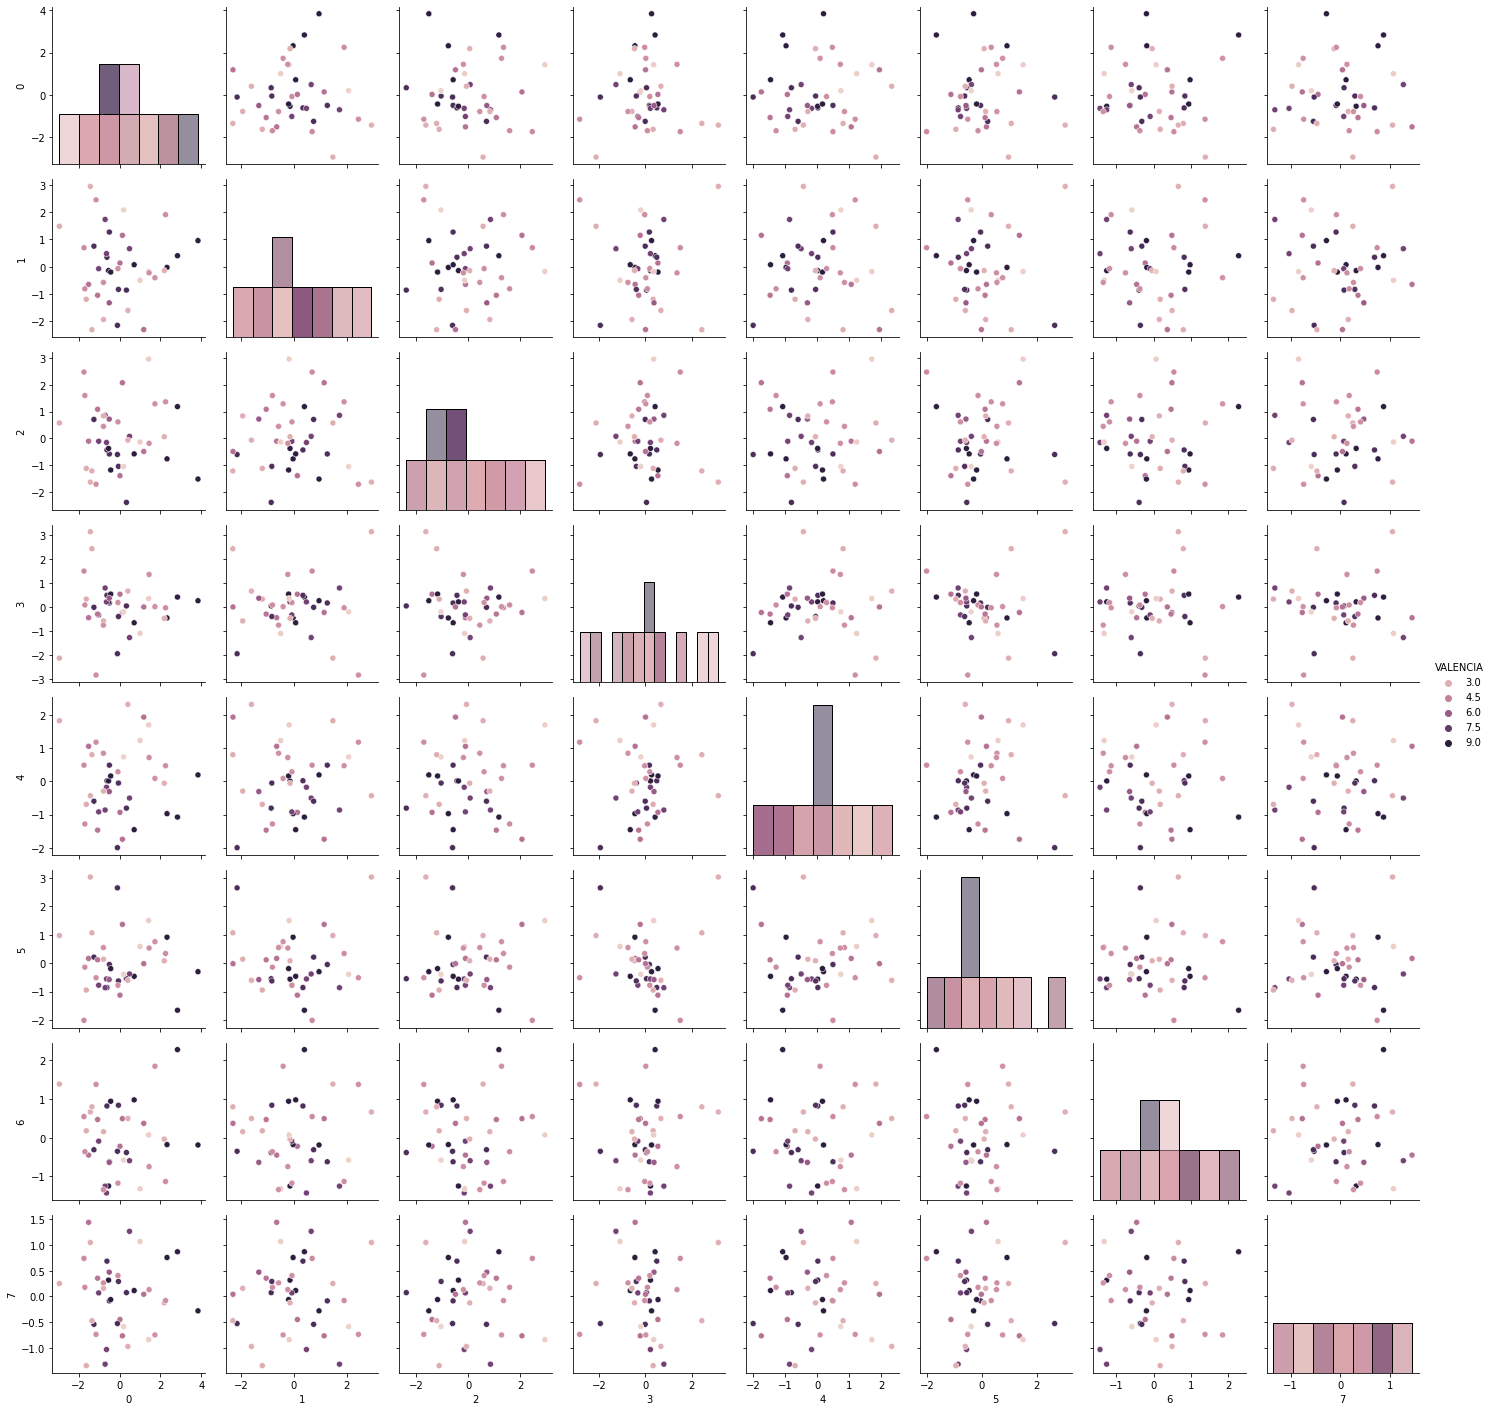

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import files
from sklearn.decomposition import PCA

# para indexar un dataframe en pandas utilizamos iloc y la convención normal
X =  dataFrame.drop(['VALENCIA'],axis=1)
X = X.values

# Se escalan los datos debido a que presentan dimensiones numéricas elevadas, dependiendo del tipo de características
from sklearn.preprocessing import scale
X = scale(X)

# Luego definimos el número de componentes y se crea el modelo PCA
pca = PCA(n_components=8)
pca.fit(X)
# Se transforman los datos al espacio latente
X_pca = pca.transform(X)
# Creamos el dataframe para seaborn
dataXpca = pd.DataFrame(X_pca)
labels  = dataFrame["VALENCIA"]
dataXpca['VALENCIA'] = labels.values

# para compiar los nombre de las columnas a un nuevo dataframe
# newDataFrame.colums = datos.columns.vules

g = sns.PairGrid(dataXpca, hue="VALENCIA")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
